In [ ]:
#pip install datasets

In [1]:
from datasets import list_datasets, load_dataset, Dataset
from pprint import pprint
import pandas as pd

In [2]:
datasets_list = list_datasets() #with_details=True
pprint(datasets_list,compact=True)

['acronym_identification', 'ai2_arc', 'ag_news', 'adversarial_qa', 'ambig_qa',
 'ade_corpus_v2', 'aeslc', 'air_dialogue', 'americas_nli', 'aslg_pc12',
 'afrikaans_ner_corpus', 'ar_cov19', 'app_reviews', 'ajgt_twitter_ar',
 'arabic_pos_dialect', 'cail2018', 'ar_sarcasm', 'assin2', 'blended_skill_talk',
 'aquamuse', 'blimp', 'bnl_newspapers', 'bookcorpus', 'bswac', 'c4', 'asnq',
 'biosses', 'autshumato', 'aqua_rat', 'arabic_billion_words',
 'bing_coronavirus_query_set', 'blbooks', 'blbooksgenre', 'caner', 'amttl',
 'anli', 'ascent_kb', 'big_patent', 'blog_authorship_corpus', 'bn_hate_speech',
 'bookcorpusopen', 'brwac', 'allegro_reviews', 'arabic_speech_corpus', 'arcd',
 'capes', 'atomic', 'bbaw_egyptian', 'bible_para', 'biomrc', 'alt', 'ami',
 'arxiv_dataset', 'banking77', 'bc2gm_corpus', 'boolq', 'bsd_ja_en', 'allocine',
 'arsentd_lev', 'babi_qa', 'billsum', 'amazon_reviews_multi', 'art', 'asset',
 'break_data', 'ar_res_reviews', 'assin', 'bbc_hindi_nli', 'beans', 'bianet',
 'c3', 'ama

 'ought/raft', 'persiannlp/parsinlu_entailment', 'piEsposito/squad_20_ptbr',
 'priya3301/tes', 'proffttega/ILLUMINATI', 'pritamdeka/cord-19-abstract',
 'proffttega/join_illuminati_to_become_rich', 'pasinit/scotus',
 'patrickvonplaten/common_voice_processed_turkish',
 'persiannlp/parsinlu_translation_en_fa',
 'projecte-aina/catalan_government_crawling', 'ntutexas/amazon',
 'openclimatefix/hrrr', 'pasinit/xlwic', 'patrickvonplaten/sensitive_data_sv',
 'patrickvonplaten/librispeech_local_dummy',
 'patrickvonplaten/scientific_papers_dummy', 'philschmid/prompted-germanquad',
 'philschmid/test_german_squad', 'pietrolesci/ag_news', 'pmc/open_access',
 'poperson1205/mrtydi-v1.1-korean-fixed', 'princeton-nlp/datasets-for-simcse',
 'projecte-aina/tecla', 'proffttega/doc', 'nlpyeditepe/tr-qnli',
 'nsi319/figures-dataset', 'nthngdy/bananas', 'osanseviero/llama_test',
 'osanseviero/test', 'pelican/test_100',
 'persiannlp/parsinlu_query_paraphrasing', 'projecte-aina/parlament_parla',
 'openclimatefi

In [3]:
con_data = load_dataset('conll2003')

Reusing dataset conll2003 (/Users/alexparizeau/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/63f4ebd1bcb7148b1644497336fd74643d4ce70123334431a3c053b7ee4e96ee)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
con_data

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14042
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3251
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3454
    })
})

In [5]:
#loading data as separate sets
conll2003_train = load_dataset('conll2003',split='train')
conll2003_val = load_dataset('conll2003',split='validation')
conll2003_test = load_dataset('conll2003',split='test')

Reusing dataset conll2003 (/Users/alexparizeau/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/63f4ebd1bcb7148b1644497336fd74643d4ce70123334431a3c053b7ee4e96ee)
Reusing dataset conll2003 (/Users/alexparizeau/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/63f4ebd1bcb7148b1644497336fd74643d4ce70123334431a3c053b7ee4e96ee)
Reusing dataset conll2003 (/Users/alexparizeau/.cache/huggingface/datasets/conll2003/conll2003/1.0.0/63f4ebd1bcb7148b1644497336fd74643d4ce70123334431a3c053b7ee4e96ee)


In [6]:
#conll2003_train.set_format(type='pandas', columns=['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'])

In [7]:
id = 0
count_doc = 0
doc_len = {}

for i in conll2003_train['tokens']:
    count_token = 0
    for token in i:
        count_token += 1
    doc_len[count_doc]= count_token
    count_doc += 1

In [8]:
sentence_len = pd.DataFrame.from_dict(doc_len, orient='index')

In [9]:
sentence_len.columns = ['sentence length']

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

(0.0, 65.0)

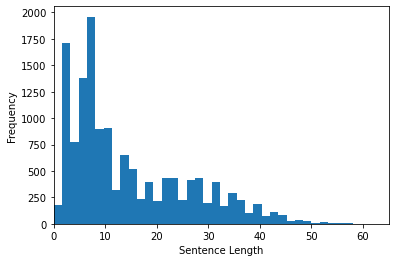

In [11]:
plt.hist(sentence_len,bins=70)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.xlim([0,65])

In [16]:
pos_tag_dict = {'"': 0, "''": 1, '#': 2, '$': 3, '(': 4, ')': 5, ',': 6, '.': 7, ':': 8, '``': 9, 'CC': 10, 'CD': 11, 'DT': 12,
 'EX': 13, 'FW': 14, 'IN': 15, 'JJ': 16, 'JJR': 17, 'JJS': 18, 'LS': 19, 'MD': 20, 'NN': 21, 'NNP': 22, 'NNPS': 23,
 'NNS': 24, 'NN|SYM': 25, 'PDT': 26, 'POS': 27, 'PRP': 28, 'PRP$': 29, 'RB': 30, 'RBR': 31, 'RBS': 32, 'RP': 33,
 'SYM': 34, 'TO': 35, 'UH': 36, 'VB': 37, 'VBD': 38, 'VBG': 39, 'VBN': 40, 'VBP': 41, 'VBZ': 42, 'WDT': 43,
 'WP': 44, 'WP$': 45, 'WRB': 46}

chunk_tag_dict = {'O': 0, 'B-ADJP': 1, 'I-ADJP': 2, 'B-ADVP': 3, 'I-ADVP': 4, 'B-CONJP': 5, 'I-CONJP': 6, 'B-INTJ': 7, 'I-INTJ': 8,
 'B-LST': 9, 'I-LST': 10, 'B-NP': 11, 'I-NP': 12, 'B-PP': 13, 'I-PP': 14, 'B-PRT': 15, 'I-PRT': 16, 'B-SBAR': 17,
 'I-SBAR': 18, 'B-UCP': 19, 'I-UCP': 20, 'B-VP': 21, 'I-VP': 22}

ner_tag_dict = {'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6, 'B-MISC': 7, 'I-MISC': 8}

In [18]:
for i in conll2003_train['ner_tags']:
    for tag in i:
        
    print(i)

[3, 0, 7, 0, 0, 0, 7, 0, 0]
[1, 2]
[5, 0]
[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 7, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 7, 8, 8, 0, 7, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0]
[0, 5, 0, 5, 0, 1, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[0, 0, 0]
[0, 1, 2, 0, 5, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0]
[0, 1, 2, 2, 0, 5, 0, 0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0]
[1, 2, 0, 5, 0, 0]
[0, 0, 0]
[1, 2, 0, 5, 0, 0]
[0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[

[0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 4, 4, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 4, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 4, 0, 0, 0, 0, 0, 0, 0]
[3, 4, 0, 0, 0, 0, 0, 0, 0]
[3, 4, 0, 0, 0, 0, 0, 0, 0]
[3, 4, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 5, 0, 5, 0, 0, 0, 0]
[5, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0]
[5, 0, 0, 0]
[5, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1]
[1, 0, 0]
[5, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 1, 0, 1, 0]
[1, 2, 0, 1, 0, 1, 0]
[1, 2, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 1, 0]
[1, 2, 0, 0, 0]
[1, 2, 0, 0, 0]
[1, 2, 0, 1, 0, 1, 0]
[1, 2, 0, 1, 0]
[1, 2, 0, 1, 0, 1, 0]
[1, 2, 0, 0, 0]
[0,

[3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 5, 6, 0, 0, 0]
[7, 0, 0, 0, 5, 6, 0]
[5, 6, 0, 5, 6, 0]
[0, 7, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 0]
[1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0]
[0, 0, 0, 0, 0, 0, 0]
[3, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]
[0, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 6, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 1, 2, 0, 5, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0, 0]
[0, 1, 2, 2, 0, 5, 0, 0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 1, 2, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 0, 0, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0, 0]
[0, 1, 2, 0, 5, 0,

[3, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 7, 8, 0]
[5, 6, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 8, 8, 0, 0, 5, 6, 6, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0]
[1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0, 0]
[1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0, 0]
[1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0]
[0, 0]
[1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0, 0]
[1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0, 0]
[0, 0]
[0, 0, 0]
[0, 0, 1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0]
[0, 0, 0]
[1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0, 0]
[0]
[1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0, 0]
[1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0, 0]
[1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0, 0, 0]
[0, 0, 1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0, 0, 0, 0, 0]
[1, 2, 0, 5, 6, 0, 0, 1, 2, 0, 5, 0, 0, 0, 0, 0]
[0, 0, 1, 2, 0, 5, 0, 0, 1, 2, 0, 5, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 1, 2, 0, 5, 6, 0, 0, 1, 2, 0, 5, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0